# Shifting and scalling normally distributed data

In a wide range of statistical analyses, data is assumed to follow a normal distribution. 

This means that the data is symmetrically distributed around a mean, forming a bell-shaped curve. The normal distribution is characterized by its mean $\mu$ and variance $\sigma^2$, which define the center and ''bandwidth'' of the distribution, respectively. The probability density function  of a normal distribution is given by 
$$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \equiv \text{Normal}(x|\mu,\sigma) \ , \quad \quad (1) $$
where $x$ is the value of the random variable, representing a specific data point or observation in our dataset

In a previous blog post [I have given a deeper explanation on normal distributions and discussed some of the reasons why we often expecte normally distributed data](https://labpresse.com/a-primer-on-the-normal-distribution/). Here I will comment on two techniques frequently used in data science that are usually built upon the expectation that data is normally distributed
- **Shifting**, or summing all data points by a single value, and 
- **Scaling**, or multiplying each data point by a constant factor.

These techniques are relevant in data science for several reasons:

- *Data Preprocessing*: Shifting and scaling are common steps in data preprocessing, helping to ensure that data is on a comparable scale, which is important for many machine learning algorithms.
- *Comparability*: When datasets are combined, they often need to be shifted and scaled to ensure comparability.
- *(Z-score) Standardization*: Standardizing data by shifting it to have a mean of zero and scaling it to have a variance of one is a common preprocessing step.


In this text, we show how these transformations keep the data normally distributed, while showing how it changing the respective means and variances. This is done in two ways: by showing it empirically by sampling random numbers using `numpy` and, later, provide the mathematical proof that shifted distributions are also normal.


## Shifting - Summing a value $\beta$ to normally distributed data, increases its mean by $\beta$ and doesn't change the variance.


Shifting the data means adding a constant value $\alpha$ to our random variable (or to every datapoint) $x$. The new variable, which we will call $v$, is expressed as:
$$ v = x + \alpha \ .   \quad \quad (2)$$

What we will show is that the quantity $v$ is also normally distributed with a means that moves (or shifts) by $\alpha$:
$$ \mu_v = \mu + \alpha \ ,$$
while variance remains unchanged:
$$ \sigma_v^2 = \sigma^2 \ . $$

Let us visualize this using the random samplers implemented in `numpy`. Later we will prove this mathematically.

### Visualizing 
First let us sample a set of datapoints `x` from a normal with a known $\mu$ and $\sigma$ and construct $v$ by summing a value $\alpha$ to it 

In [1]:
import numpy as np 
mu = 3
sig = 2
x = np.random.normal(mu,sig,size=10000)

alpha = 5
v = x + alpha #Shifting by alpha

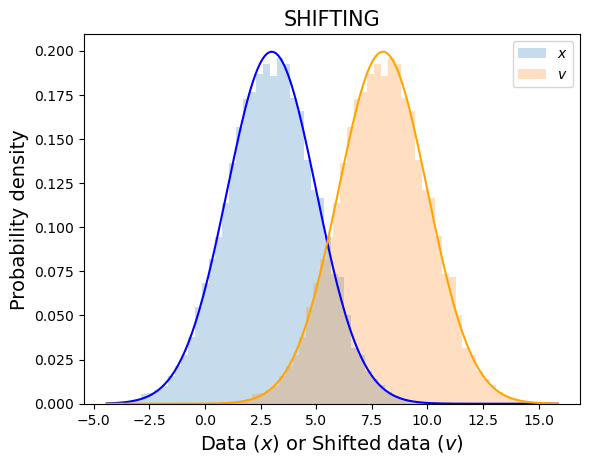

In [2]:
from matplotlib import pyplot as plt

gaussian = lambda x,mu,sig: np.exp(-((x-mu)/sig)**2/2)/(np.sqrt(2*np.pi)*sig)
grid = np.linspace(x.min(),v.max(),201)

plt.hist(x,bins=50,density=True,alpha=.25,label=r'$x$')
plt.plot(grid,gaussian(grid,mu,sig),color='blue')

plt.hist(v,bins=50,density=True,alpha=.25,label=r'$v$')
plt.plot(grid,gaussian(grid,mu+alpha,sig),color='orange')

plt.xlabel('Data ($x$) or Shifted data ($v$)',fontsize=14)
plt.ylabel('Probability density',fontsize=14)
plt.title('SHIFTING',fontsize=15)
plt.legend()
plt.show()

Note that in the block of code above the blue histogram represents the original data $x$, which is normally with mean $\mu$ and variance $\sigma^2$. The graph of the normal distribution, defined in (1), is presented in blue. Analogously, the orange histogram shows the shifted data $v$, which is, as expected, normally distributed with mean $\mu + \alpha$ and the same variance $\sigma^2$, represented by the orange curve. This illustrates our statement from a phenomenological perspective, but we should further demonstrate this rigorously, in other words (mathematically) prove it.


### Mathematical proof

The goal is to derive the probability distribution of $v$ from a known probability distribution of $x$. To do this, we need to  be able to calculate the probability that $x$ is within an interval $(a,b)$. This is calculated by integrating $p(x)$ over that interval, which is writen as
$$ P(a<x<b) \equiv \int_a^b \mathrm{d}x \ p(x) = \int_a^b \mathrm{d}x \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \ .  \quad \quad (3) $$
Note that we use capital $P$ to represent the probability of the interval (the integral) while $p$ is reserved for the probability density (integrand).

If $v$ is a function of $x$, in particular the one given by (2), we must have that the probability in the $x$-interval $(a,b)$ matches the probability in the corresponding $v$-interval $(a+\alpha,b+\alpha)$. That means
$$ P(a+\alpha < v < b+\alpha) = P(a < x < b) \ .$$
Then, using the definition of probability over an interval (3) we have
$$ \int_{a+\alpha}^{b+\alpha} \mathrm{d}v \ p(v) = \int_a^b \mathrm{d}x \ p(x) \ .  $$

This is similar to what we see in calculus as [integration by substitution](https://openstax.org/books/calculus-volume-1/pages/5-5-substitution). The equality above is valid for all $a$ and $b$ if 
$$ p(v) = p(x) \left| \frac{\mathrm{d}x}{\mathrm{d}v} \right| \ . \quad \quad (4)$$
Some other requirements for the equation above to hold are necessary. Mainly, $v$ as a function of $x$ must be differentiable and bijective, which is true in (2) since the inverse transformation is $v= x+\alpha$ is $x=v-\alpha$. Thus, we have
$$ p(v) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} = \frac{1}{\sqrt{2\pi \sigma^2}}  e^{-\frac{(v-(\alpha+\mu))^2}{2\sigma^2}} \ ,$$
which, going back to the definition of the normal distribution (1), can be written as 
$$ p(v) =  \text{Normal}(v|\mu_v,\sigma_v) \ , $$
with $ \mu_v = \mu + \alpha $ and $ \sigma_v^2 = \sigma^2$, thus completing the proof. 

With the appropriate proof done by shifting, let us move into the same process for scaling

## Scaling - Multiplying normally distributed data by a value, $\beta$, multiply its mean by $\beta$ and variance by $\beta^2$.


When we scale the data by multiplying our random varible, $x$, by a constant factor, $\beta$, the new variable $w$ is expressed as:
$$ w = \beta \cdot x \ . \quad \quad \ (5)$$

What we will show is that $w$ is also normally distributed, with mean and variance  given as
$$ \mu_w = \beta \cdot \mu $$
$$ \sigma_w^2 = \beta^2 \cdot \sigma^2 $$

As done previously for shifting, let us first verify that this holds by visualizing it by using random number sampling. Later we will prove it mathematically.


### Visualizing 

In [3]:
beta = 2
w = beta*x

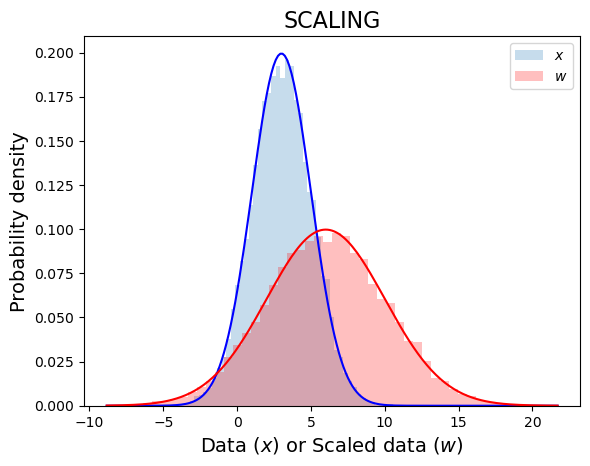

In [4]:
grid = np.linspace(w.min(),w.max(),201)

plt.hist(x,bins=50,density=True,alpha=.25,label=r'$x$')
plt.plot(grid,gaussian(grid,mu,sig),color='b')

plt.hist(w,bins=50,density=True,alpha=.25,color='r',label=r'$w$')
plt.plot(grid,gaussian(grid,mu*beta,sig*beta),color='r')

plt.xlabel('Data ($x$) or Scaled data ($w$)',fontsize=14)
plt.ylabel('Probability density',fontsize=14)
plt.title('SCALING',fontsize=16)
plt.legend()
plt.show()

### Mathematical proof

The goal is to derive the probability distribution for the scaled variable $w$ from a known probability distribution of $x$. For this we do not need to repeat the entire formulation. The logic that led to equation (4) can be directly applied by substituting $v$ with $w$. By following the same steps and reasoning, we can obtain the corresponding relationship for the probability distribution of $w$  and $x$ as
 $$ p(w) = p(x) \left| \frac{\mathrm{d}x}{\mathrm{d}w} \right| \ . \quad \quad (6) $$

Given the definition in (5), $w = \beta x$, we can find the derivative as 
 $$ \frac{\mathrm{d}x}{\mathrm{d}w} = \frac{1}{\beta} \ ,
 \quad \text{thus} \quad  p(w) = p(x) \left| \frac{1}{\beta} \right| \ .  $$

Similarly to what was done in the previous problem (shifting), the probability density function of $w$ becomes
 $$ p(w) =  \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}  \frac{1}{\beta}  = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(w/\beta-\mu)^2}{2\sigma^2}}  \frac{1}{\beta} \ .  $$


Which, with some algebraic steps and comparing to (1) we have
 $$ p(w) = \frac{1}{\sqrt{2\pi (\beta^2 \sigma^2)}} e^{-\frac{(w - \beta \mu)^2}{2(\beta^2 \sigma^2)}} = \text{Normal}(w|\beta\mu,\beta^2 \sigma^2)  \ .  $$
Therefore we can see that it will also be normally distributed, but with mean $\mu_w = \beta \mu$ and variance $\sigma_w^2 = \beta^2 \sigma^2$, compleating the proof.


Now, let us move to another useful transformation that is an example of using shifting and scaling together.


## Z-score standardization


The Z-score, $z$, is defined as
$$ z \equiv \frac{x-\mu}{\sigma} \ .  \quad $$
where $x$ is the original variable. As we defined in (1), it is originally normally distributed with mean $\mu$ and variance $\sigma^2$. The Z-score transforms the original variable $x$ into a [standard normal](https://labpresse.com/a-primer-on-the-normal-distribution/) variable $z$, meaning $z$ is normally distributed  with mean  0 and  variance of 1.

Unlike in the previous cases, I will not provide a complete mathematical proof. Instead, we can understand this transformation as a composition of the two operations mentioned here, for which the mathematical proof was given, 

- Shifting: Subtracting the mean $\mu$ from $x$ (setting $\alpha=−μ$). This operation centers the distribution at $0$, thus the new mean becomes $\mu-\mu=0$.
- Scaling: Dividing by the $\sigma$ ($\beta = \frac{1}{\sigma}$​). This operation divides the variance by itself, such that the new variance becomes $\frac{\sigma^2}{\sigma^2}=1$.

By performing these operations sequentially, we transform the original variable $x$ into the *standard* normal variable $z$. Now, let us observe this through random sampling.

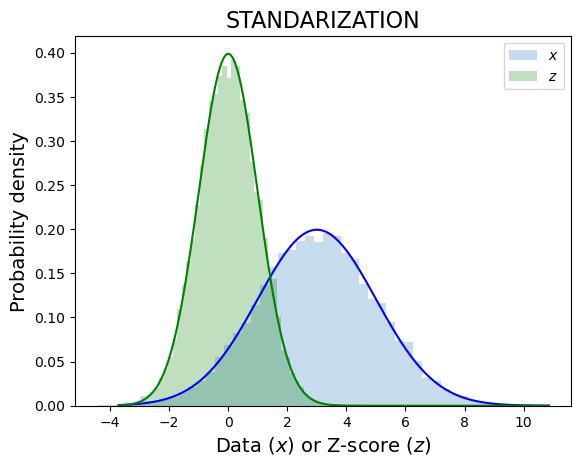

In [5]:
z = (x-mu)/sig
grid = np.linspace(z.min(),x.max(),201)

plt.hist(x,bins=50,density=True,alpha=.25,label=r'$x$')
plt.plot(grid,gaussian(grid,mu,sig),color='b')

plt.hist(z,bins=50,density=True,alpha=.25,color='g',label=r'$z$')
plt.plot(grid,gaussian(grid,0,1),color='g')

plt.xlabel('Data ($x$) or Z-score ($z$)',fontsize=14)
plt.ylabel('Probability density',fontsize=14)
plt.title('STANDARIZATION',fontsize=16)
plt.legend()
plt.show()

## Conclusion

In this blog, we have explored the mathematical foundations of shifting, scaling, and the z-score transformation of random variables. Understanding why we perform these transformations is fundamental in data science. Interestingly, tranformations that compose shifting and scaling are also known as [affine transformations](https://mathworld.wolfram.com/AffineTransformation.html). By comprehending how these transformations affect data (in concrete terms) or probability distributions (within the mathematical abstraction), we can better interpret and manipulate data in various statistical analyses. These concepts are not only fundamental on their own but also crucial for more advanced topics, such as error propagation, which we will discuss in future blog posts.

One important remark here is that our derivations assume that the original variable $x$ follows a normal distribution. The results shown are not guaranteed if this assumption is not true. For example, if the original variable $x$ is not normally distributed, the resulting z-scores or scaled variables should not follow a normal distribution either. This highlights the necessity of understanding the underlying distribution of your data before applying these transformations.

Stay tuned for future posts where we will delve deeper into error propagation and other advanced topics in probability.

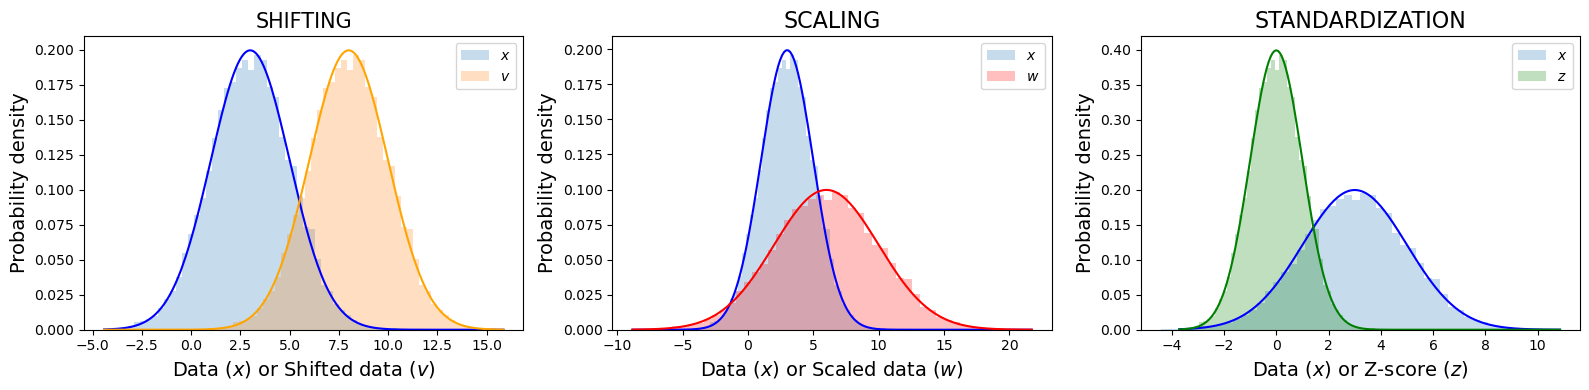

In [7]:


fig, ax = plt.subplots(1,3, figsize=(16, 4))

# First plot: SHIFTING
grid = np.linspace(x.min(), v.max(), 201)
ax[0].hist(x, bins=50, density=True, alpha=0.25, label=r'$x$')
ax[0].plot(grid, gaussian(grid, mu, sig), color='blue')
ax[0].hist(v, bins=50, density=True, alpha=0.25, label=r'$v$')
ax[0].plot(grid, gaussian(grid, mu + alpha, sig), color='orange')
ax[0].set_xlabel('Data ($x$) or Shifted data ($v$)', fontsize=14)
ax[0].set_ylabel('Probability density', fontsize=14)
ax[0].set_title('SHIFTING', fontsize=15)
ax[0].legend()

# Second plot: SCALING
grid = np.linspace(w.min(), w.max(), 201)
ax[1].hist(x, bins=50, density=True, alpha=0.25, label=r'$x$')
ax[1].plot(grid, gaussian(grid, mu, sig), color='blue')
ax[1].hist(w, bins=50, density=True, alpha=0.25, color='red', label=r'$w$')
ax[1].plot(grid, gaussian(grid, mu * beta, sig * beta), color='red')
ax[1].set_xlabel('Data ($x$) or Scaled data ($w$)', fontsize=14)
ax[1].set_ylabel('Probability density', fontsize=14)
ax[1].set_title('SCALING', fontsize=16)
ax[1].legend()

# Third plot: STANDARDIZATION
grid = np.linspace(z.min(), x.max(), 201)
ax[2].hist(x, bins=50, density=True, alpha=0.25, label=r'$x$')
ax[2].plot(grid, gaussian(grid, mu, sig), color='blue')
ax[2].hist(z, bins=50, density=True, alpha=0.25, color='green', label=r'$z$')
ax[2].plot(grid, gaussian(grid, 0, 1), color='green')
ax[2].set_xlabel('Data ($x$) or Z-score ($z$)', fontsize=14)
ax[2].set_ylabel('Probability density', fontsize=14)
ax[2].set_title('STANDARDIZATION', fontsize=16)
ax[2].legend()

plt.tight_layout()
plt.show()
